### **UNIT 4**
### **Q4.1)Program to split the Data sets using Python**

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split

In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
f=pd.read_csv("./Datasets/toy_data.csv")
new_cols=pd.get_dummies(f["Type"])*1
f=f.drop(["Type"],axis=1)
f=pd.concat([new_cols,f],axis=1)
minmax=MinMaxScaler()
f[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]]=minmax.fit_transform(f[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]])
f=f.drop(["UDI","Product ID"],axis=1)
res=f["Failure Type"]
f=f.drop(["Failure Type"],axis=1)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(f,res,test_size=0.2)


In [93]:
print("Test Size:",len(x_test),"Train Size:",len(x_train))

Test Size: 2000 Train Size: 8000


### **Q)Program to balance a data set.**

In [94]:
res.value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [95]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [96]:


x_train,x_test,y_train,y_test=train_test_split(f,res,test_size=0.2)

In [97]:
y_test.value_counts()

No Failure                  1924
Heat Dissipation Failure      29
Power Failure                 15
Tool Wear Failure             14
Overstrain Failure            12
Random Failures                6
Name: Failure Type, dtype: int64

In [98]:
x_train,y_train=smote.fit_resample(x_train,y_train)
x_test,y_test=smote.fit_resample(x_test,y_test)

In [99]:
y_test.value_counts()

No Failure                  1924
Heat Dissipation Failure    1924
Overstrain Failure          1924
Random Failures             1924
Tool Wear Failure           1924
Power Failure               1924
Name: Failure Type, dtype: int64

### **Program to apply CART Decsion Tree**

In [100]:
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [101]:
from sklearn.tree import DecisionTreeClassifier
md=DecisionTreeClassifier(max_depth=6)
pred=md.fit(x_train,y_train)


[Text(0.4820478723404255, 0.9285714285714286, 'x[7] <= 0.739\ngini = 0.833\nsamples = 46368\nvalue = [7728, 7728, 7728, 7728, 7728, 7728]'),
 Text(0.2765957446808511, 0.7857142857142857, 'x[6] <= 0.805\ngini = 0.753\nsamples = 28358\nvalue = [6716, 6749, 206, 6959, 7728, 0]'),
 Text(0.15691489361702127, 0.6428571428571429, 'x[5] <= 0.123\ngini = 0.725\nsamples = 23856\nvalue = [6670, 6714, 25, 2719, 7728, 0]'),
 Text(0.0851063829787234, 0.5, 'x[4] <= 0.758\ngini = 0.404\nsamples = 8885\nvalue = [6667, 792, 25, 0, 1401, 0]'),
 Text(0.0425531914893617, 0.35714285714285715, 'x[3] <= 0.685\ngini = 0.255\nsamples = 7583\nvalue = [6496, 704, 25, 0, 358, 0]'),
 Text(0.02127659574468085, 0.21428571428571427, 'x[3] <= 0.599\ngini = 0.401\nsamples = 839\nvalue = [62, 635, 23, 0, 119, 0]'),
 Text(0.010638297872340425, 0.07142857142857142, 'gini = 0.043\nsamples = 587\nvalue = [1, 574, 12, 0, 0, 0]'),
 Text(0.031914893617021274, 0.07142857142857142, 'gini = 0.658\nsamples = 252\nvalue = [61, 61, 1

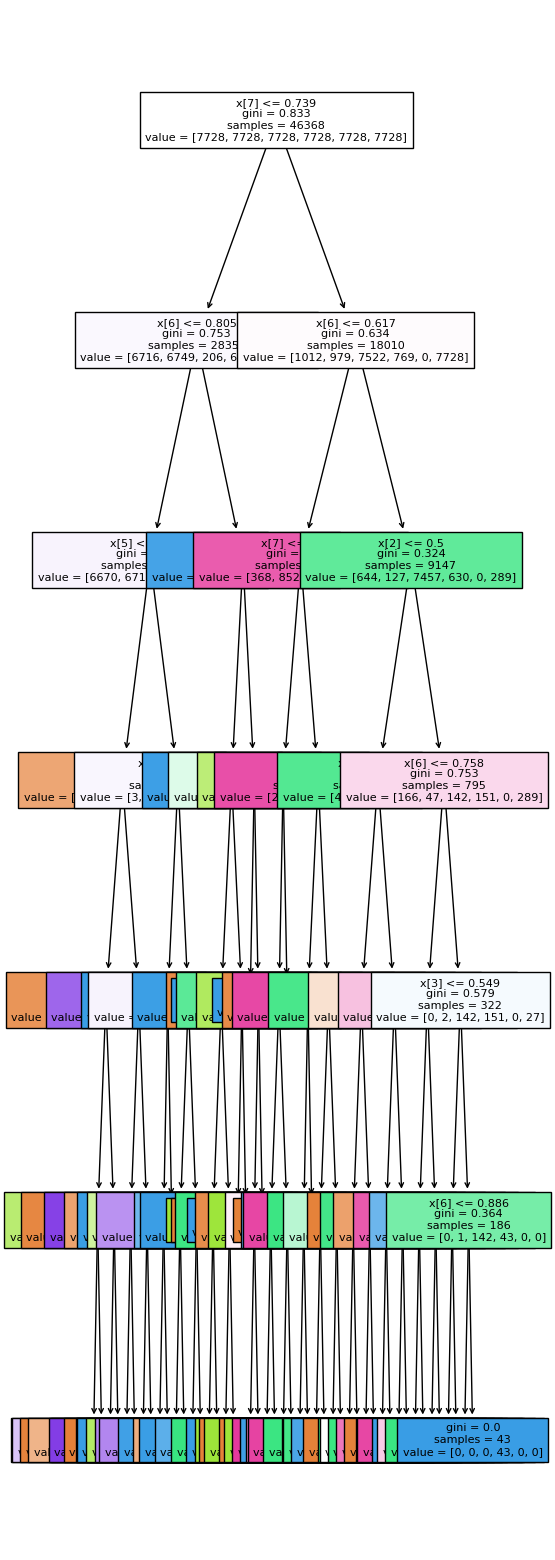

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,20))
from sklearn.tree import plot_tree
plot_tree(pred,filled=True,max_depth=6,fontsize=8)

In [103]:
res_cart=pred.predict(x_test)

0.7227997227997228


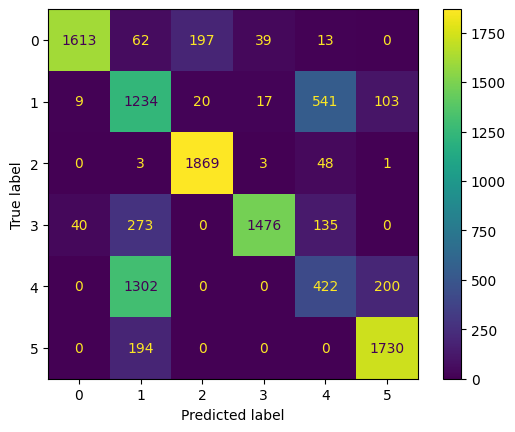

In [104]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score 
print(accuracy_score(res_cart, y_test)) 
confusion_matrix = confusion_matrix(y_test, res_cart)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

### ****Q4.4)Program to impleament C5.0 Decision tree****

In [105]:
md=DecisionTreeClassifier(criterion="entropy")
pred=md.fit(x_train,y_train)
res_cs50=pred.predict(x_test)
print(accuracy_score(res_cs50, y_test))  

0.6779279279279279


### **Q4.4)Program to impleament Random Decision tree**

In [106]:
from sklearn.ensemble import RandomForestClassifier
md=RandomForestClassifier()
pred=md.fit(x_train,y_train)
res_random=pred.predict(x_test)
print(accuracy_score(res_random, y_test))  

0.6692654192654193


In [107]:
dict={"Random forest":res_random,
      "Cart":res_cart,
      "CS5":res_cs50
    }
result_tale=pd.DataFrame(dict)

In [108]:
# print(result_tale["Random forest"].value_counts())

### **UNIT 5**
### **Q5.1)Program for evaluaation of the model using cross validation**

In [109]:
from sklearn.model_selection import cross_validate
md=DecisionTreeClassifier(max_depth=11)
cv_scores = cross_validate(md, x_train, y_train, cv=10)

print(np.mean(cv_scores["test_score"]))


0.968879397493582


In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
test_score=[]
train_score=[]
x_axis=[]
for i in range(1,21):
    md=DecisionTreeClassifier(max_depth=i)
    pred=md.fit(x_train,y_train)
    res_cart_test=pred.predict(x_test)
    test_score.append(accuracy_score(res_cart_test,y_test))
    
    res_cart_train=pred.predict(x_train)
    train_score.append(accuracy_score(res_cart_train,y_train))
    # print("Depth:",i,"train:",accuracy_score(res_cart_train,y_train),"test:",accuracy_score(res_cart_test,y_test))
    x_axis.append(i)

### **Q5.2)Measuring uneven cost of error of a model**
#### **Graphical representaion of depth vs accuracy**

Text(0, 0.5, 'Accuaracy')

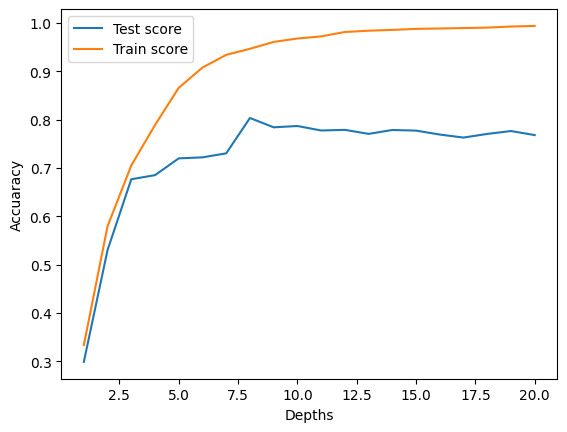

In [111]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.lineplot(x=x_axis,y=test_score,label="Test score")
sb.lineplot(x=x_axis,y=train_score,label="Train score")
plt.xlabel("Depths")
plt.ylabel("Accuaracy")


#### **The depth below 5 is making model underfit while the depth above 9 is making model overfit**

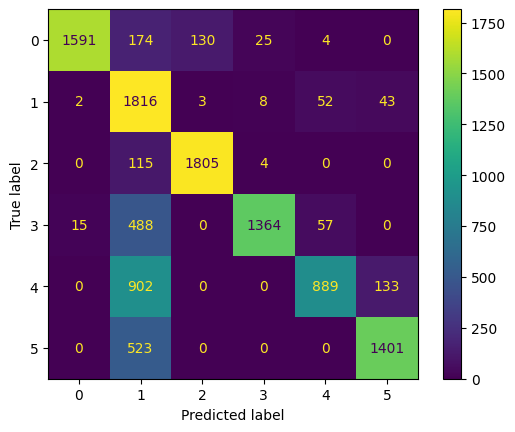

In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, res_cart_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()